In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r"C:\Users\AN515\Desktop\清\2\HW2\dataset.csv")
X = data[['Runtime']]  # 特徵矩陣
y = data['faults']     # 目標變量

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("斜率（權重）w:", model.coef_)
print("截距 b:", model.intercept_)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')




斜率（權重）w: [0.71788888]
截距 b: -157.52002738479882
Mean Squared Error: 949888.2814132371
R^2 Score: 0.6486418500386513


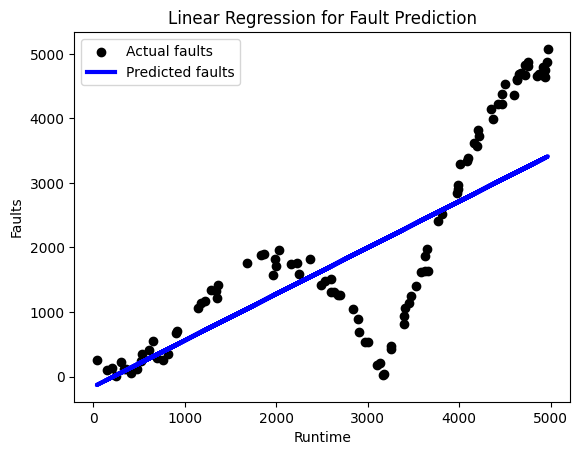

In [5]:
plt.scatter(X_test, y_test, color='black', label='Actual faults')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted faults')
plt.title('Linear Regression for Fault Prediction')
plt.xlabel('Runtime')
plt.ylabel('Faults')
plt.legend()
plt.show()

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建一個多項式特徵生成器
degree = 6
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 擬合模型
polyreg.fit(X_train, y_train)

# 預測測試集的結果
y_pred1 = polyreg.predict(X_test)

In [14]:
# 計算性能指標
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

# 打印性能指標
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 99116.43327247465
R^2 Score: 0.963337407875407


c:\Users\AN515\.pyenv\pyenv-win\versions\3.8.5\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


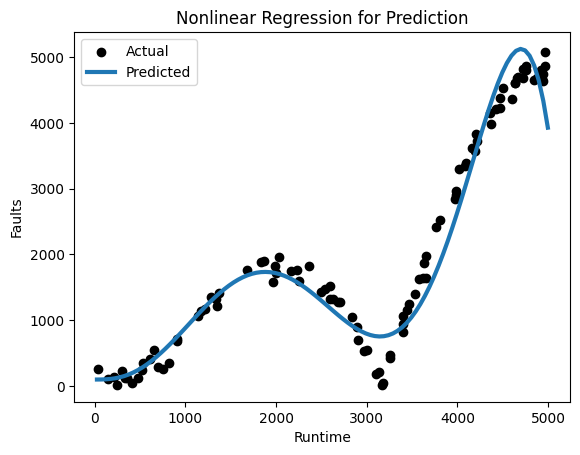

In [15]:
# 繪製觀測值
plt.scatter(X_test, y_test, color='black', label='Actual')

# 產生平滑曲線的輸入
X_fit = np.linspace(X.min(), X.max(), 100)
y_fit = polyreg.predict(X_fit)

# 繪圖
plt.plot(X_fit, y_fit, linewidth=3, label='Predicted')
plt.title('Nonlinear Regression for Prediction')
plt.xlabel('Runtime')
plt.ylabel('Faults')
plt.legend()
plt.show()
